In [27]:
# load core dependencies
import networkx as nx
import pandas as pd
import numpy as np

# load visual dependencies
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

# data path
asset_data_path = 'https://raw.githubusercontent.com/eddiexunyc/web_analytics_work/refs/heads/main/Assignment%201/Resources/daily_asset_prices.csv'

In [44]:
# read raw data
raw_asset_data = pd.read_csv(asset_data_path, index_col = 'Date')
raw_asset_data.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,...,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,81.83,16.40,235.46,46.78,69.87,114.60,47.69,33.18,30.95,60.02,...,58.20,72.77,33.53,58.70,69.82,26.25,64.01,55.70,104.96,94.5100
2017-11-07,81.89,16.43,235.42,46.56,69.64,114.65,47.22,33.07,31.09,59.65,...,58.17,72.20,33.52,58.64,70.16,26.38,63.66,55.66,105.01,94.5400
2017-11-06,81.86,16.53,235.41,46.86,69.90,115.26,47.20,33.34,31.22,59.18,...,58.67,71.98,33.34,58.58,70.25,26.75,63.63,55.00,105.00,94.7500
2017-11-03,81.80,16.22,235.18,46.34,69.80,115.42,47.09,33.39,31.22,59.19,...,58.58,71.88,33.66,58.83,68.68,26.78,63.49,55.21,105.00,94.4400
2017-11-02,81.73,16.12,234.96,46.58,69.91,116.15,47.31,33.50,31.43,59.05,...,58.69,71.89,33.71,58.86,68.48,26.89,62.99,55.01,105.04,94.6299


In [45]:
# identify the column name
raw_asset_data.columns

Index(['Bonds Global', 'Commodities', 'DOW', 'Emerg Markets', 'EAFE',
       'Emerg Markets Bonds', 'Pacifix ex Japan', 'Germany', 'Italy', 'Japan',
       'France', 'UK', 'GBP', 'China Large Cap', 'Euro', 'China', 'Yen',
       'Gold Miners', 'Gold', '10yr treasuries', 'US real estate',
       'High yield Bond', 'Corp Bond', 'Silver', 'SNP 500', 'Bonds II',
       '20+ Treasuries', 'Oil', 'USD', 'Europe', 'Pacific ', 'VXX',
       'Materials', 'Energy', 'Finance', 'Tech', 'Utilities', 'ST Corp Bond',
       'CHF'],
      dtype='object')

In [50]:
# drop all columns except for bonds
asset_data = raw_asset_data.drop(['Commodities', 'DOW', 'Emerg Markets', 'EAFE',
    'Pacifix ex Japan', 'Germany', 'Italy', 'Japan','France', 'UK', 'GBP', 'China Large Cap', 'Euro', 'China', 'Yen',
    'Gold Miners', 'Gold', 'Silver', 'SNP 500','Oil', 'USD', 'Europe', 'Pacific ', 'VXX', 'Materials', 
    'Energy', 'Finance', 'Tech', 'Utilities', 'CHF'], axis = 1, inplace = False)

asset_data.head()

,Bonds Global,Emerg Markets Bonds,10yr treasuries,US real estate,High yield Bond,Corp Bond,Bonds II,20+ Treasuries,ST Corp Bond
Date,,,,,,,,,
2017-11-08,81.83,114.60,106.41,82.49,36.75,120.90,114.23,126.36,104.96
2017-11-07,81.89,114.65,106.54,81.94,36.93,121.06,114.30,126.64,105.01
2017-11-06,81.86,115.26,106.50,81.36,36.98,121.16,114.14,126.11,105.00
2017-11-03,81.80,115.42,106.37,80.43,37.00,121.13,113.95,125.64,105.00
2017-11-02,81.73,116.15,106.20,80.48,37.02,120.99,113.87,125.30,105.04


In [52]:
bond_log_return = pd.DataFrame()

# create the log return for all bonds
for x in asset_data.columns:
    bond_log_return[x] = np.log(asset_data[x]).diff(-1)

bond_log_return.head()

,Bonds Global,Emerg Markets Bonds,10yr treasuries,US real estate,High yield Bond,Corp Bond,Bonds II,20+ Treasuries,ST Corp Bond
Date,,,,,,,,,
2017-11-08,-0.000733,-0.000436,-0.001221,0.006690,-0.004886,-0.001323,-0.000613,-0.002213,-0.000476
2017-11-07,0.000366,-0.005306,0.000376,0.007104,-0.001353,-0.000826,0.001401,0.004194,0.000095
2017-11-06,0.000733,-0.001387,0.001221,0.011497,-0.000541,0.000248,0.001666,0.003734,0.000000
2017-11-03,0.000856,-0.006305,0.001599,-0.000621,-0.000540,0.001156,0.000702,0.002710,-0.000381
2017-11-02,0.000979,0.002759,0.001319,0.006232,-0.000540,-0.000165,0.001494,0.004399,0.000000


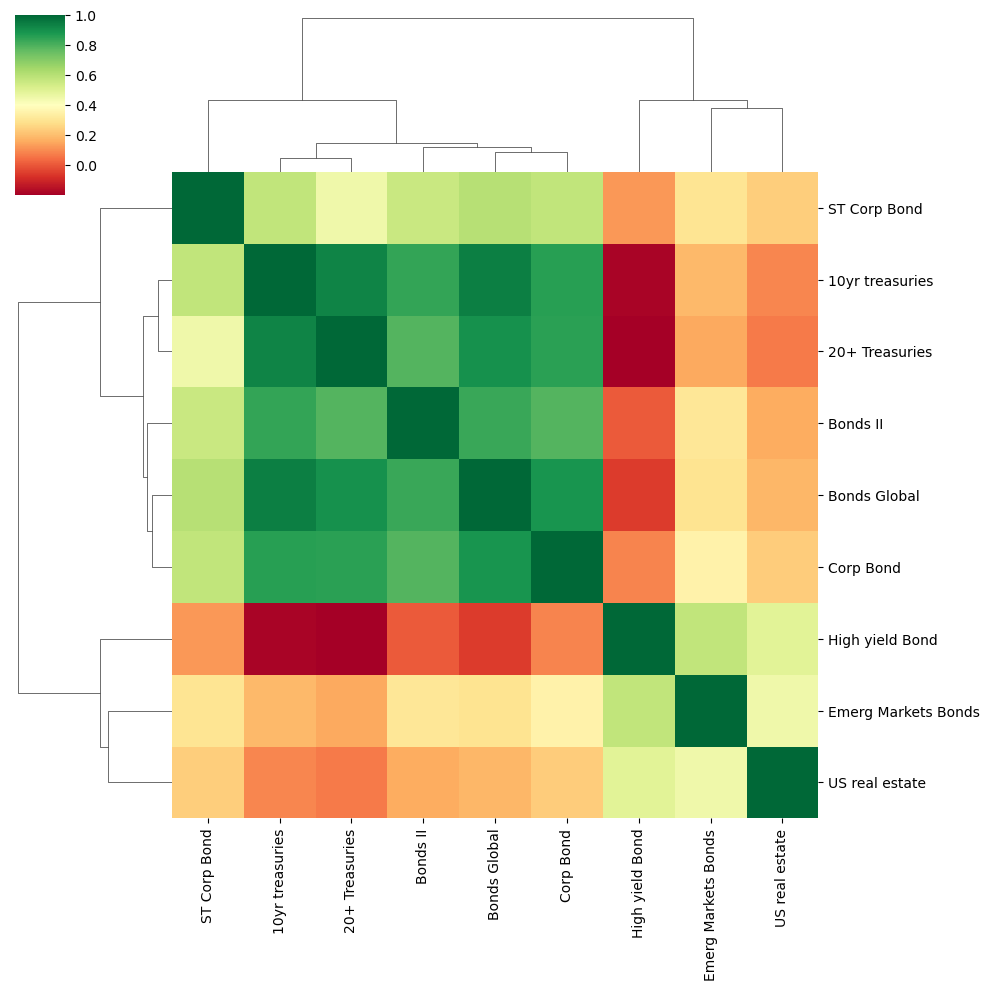

In [53]:
# create a correlation matrix for the bonds
bond_corr_matrix = bond_log_return.corr()

# create a heat map
sns.clustermap(bond_corr_matrix, cmap="RdYlGn")
plt.show()

In [54]:
# convert matrix to list of edges and rename the columns
edges = bond_corr_matrix.stack().reset_index()
edges.columns = ["bond_1", "bond_2", "correlation"]

# remove self correlations
edges = edges.loc[edges["bond_1"] != edges["bond_2"]].copy()

# show the first 5 rows of the edge list dataframe.
edges.head()

,bond_1,bond_2,correlation
1,Bonds Global,Emerg Markets Bonds,0.296679
2,Bonds Global,10yr treasuries,0.943114
3,Bonds Global,US real estate,0.183265
4,Bonds Global,High yield Bond,-0.056202
5,Bonds Global,Corp Bond,0.885493


In [57]:
# create a graph
graph_1 = nx.from_pandas_edgelist(edges, 'bond_1', 'bond_2', edge_attr=['correlation'])

print(nx.info(graph_1))

Graph with 9 nodes and 36 edges


/var/folders/h4/zjq554hs0b57vqfcrc5738wh0000gn/T/ipykernel_38594/2328285433.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph_1))


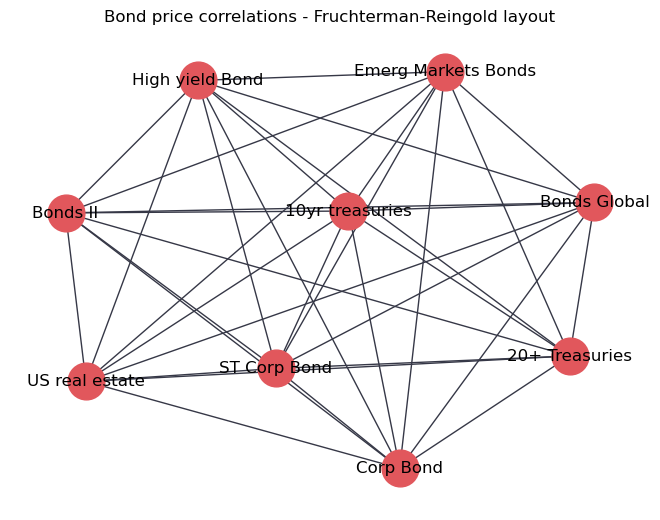

In [60]:
# graph the network
# draw improved graph
nx.draw(
    graph_1,
    pos=nx.fruchterman_reingold_layout(graph_1),
    with_labels=True,
        node_size=700,
        node_color="#e1575c",
        edge_color="#363847"
)
plt.title("Bond price correlations - Fruchterman-Reingold layout")
plt.show()